In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/sample_submission.csv
/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/Natural Language Processing with Disaster Tweets (1).ipynb
/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/train.csv
/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/test.csv


# Reading Data

In [2]:
train_dataset = pd.read_csv('/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/train.csv')
train_dataset.drop(['keyword','location','id'],axis=1,inplace=True)
train_dataset.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test_dataset = pd.read_csv('/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/test.csv')
test_dataset.drop(['keyword','location','id'],axis=1,inplace=True)
test_dataset.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


# Visualizing Data

In [5]:
px.bar(train_dataset.target.value_counts(),title='Target Class Distribution',labels={'value':'Count','index':'Classes'})

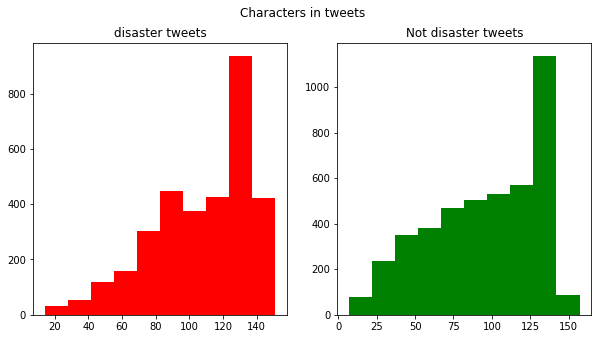

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_dataset[train_dataset['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_dataset[train_dataset['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

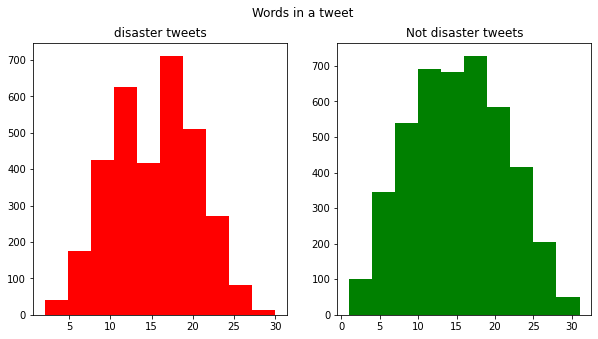

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_dataset[train_dataset['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train_dataset[train_dataset['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

Text(0.5, 0.98, 'Average word length in each tweet')

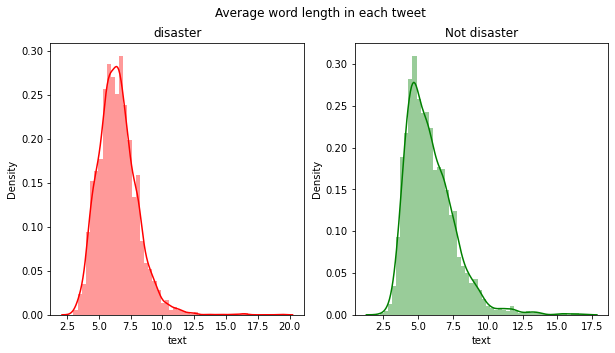

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_dataset[train_dataset['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_dataset[train_dataset['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

# Modeling Data - Machine Learning

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_dataset['text'],train_dataset['target'],test_size=0.2)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [11]:
model_1 = Pipeline([
    ('TfidfVectorizer',TfidfVectorizer()),
    ('Classifier',MultinomialNB())
])

In [12]:
model_1.fit(X_train,y_train)
preds = model_1.predict(X_val)
accuracy_score(preds,y_val)

0.7852921864740644

# Modeling Data - Deep Learning

In [13]:
from tensorflow.keras.layers import TextVectorization

In [14]:
len(np.unique(' '.join(train_dataset['text']))[0])

776810

In [15]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


def parse_text(text):
    #print(f'Input: {text}')

    text = re.sub("[^a-zA-Z]", ' ', text)
    #print(f'Remove punctuation and numbers: {text}')

    text = text.lower().split()
    #print(f'Lowercase and split: {text}')

    swords = set(stopwords.words("english"))
    text = [w for w in text if w not in swords]
    #print(f'Remove stop words: {text}')
    
    text = " ".join(text)
    #print(f'Final: {text}')
    
    text = text.replace(' https ',' ')
    text = text.replace(' http ',' ')

    return text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
full_text = X_train.reset_index()['text']
cleaned_text = [parse_text(full_text[i]) for i in range(len(full_text))]
len(np.unique(' '.join(cleaned_text))[0])

438670

In [17]:
from collections import Counter
dictionary = Counter(np.unique(' '.join(cleaned_text))[0].split(' '))

In [18]:
sorted_list = list(dictionary.values())
sorted_list.sort()
most_words_frequency = np.percentile(sorted_list,95)
most_words_frequency

13.0

In [19]:
count = 0
list_words = []
for i in dictionary.items(): 
    word = i[0]
    freq = i[1]
    if freq < most_words_frequency:
        count = count + 1
        list_words.append(word)
count

17823

## There are 21748 (test + train data) words that cover 99% of all tweets in the dataset while there are 549,000 + words overall. These words do not come into the standard list of stop words.

In [20]:
list_words

['boulder',
 'deputies',
 'waiting',
 'squad',
 'grenade',
 'stearns',
 'cadm',
 'lnko',
 'pagasa',
 'yellow',
 'panay',
 'guimaras',
 'negros',
 'lying',
 'areas',
 'landslides',
 'mountainous',
 'jax',
 'outlook',
 'hwo',
 'fcb',
 'dz',
 'wx',
 'elgeotaofeeq',
 'piece',
 'putting',
 'ambition',
 'voted',
 'seek',
 'capsize',
 'thighs',
 'tide',
 'battleship',
 'samaritans',
 'yuualoqw',
 'chat',
 'twimbos',
 'zimpapersviews',
 'rage',
 'rising',
 'costs',
 'tft',
 'bb',
 'xaz',
 'corleonedaboss',
 'risky',
 'costly',
 'alil',
 'tha',
 'nah',
 'matters',
 'ohio',
 'cle',
 'cuyahoga',
 'greening',
 'vacant',
 'lands',
 'sdxvp',
 'totoooooo',
 'totoooooooooo',
 'historicalmages',
 'approaching',
 'stratford',
 'april',
 'awc',
 'uuwb',
 'friggin',
 'destiel',
 'sucks',
 'vine',
 'description',
 'mkx',
 'ux',
 'ozt',
 'restart',
 'fleet',
 'approaches',
 'dbaujp',
 'ub',
 'profile',
 'signing',
 'nffc',
 'wesley',
 'verhoek',
 'household',
 'tpanic',
 'fa',
 'af',
 'lived',
 'countries',

In [21]:
vectorizer = TextVectorization(
    #max_tokens=21748,
    max_tokens=10000,
    output_mode='int',
    output_sequence_length=None
)
vectorizer.adapt(cleaned_text)

2022-06-19 17:40:13.659736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 17:40:13.664793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 17:40:13.665518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 17:40:13.667057: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [22]:
import tensorflow_hub as hub
embed = tf.keras.layers.Embedding(input_dim=10000,output_dim=64)
embed_2 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False,dtype=tf.string,input_shape=[])

In [23]:
X_train_fast = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
inputs = tf.keras.layers.Input(shape=[],dtype='string')
#x = vectorizer(inputs)
x = embed_2(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [25]:
model_2.fit(X_train_fast,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
191/191 [==============================] - 6s 14ms/step - loss: 0.5148 - accuracy: 0.7732 - val_loss: 0.4422 - val_accuracy: 0.8063
Epoch 2/10
191/191 [==============================] - 2s 12ms/step - loss: 0.4155 - accuracy: 0.8135 - val_loss: 0.4314 - val_accuracy: 0.8037
Epoch 3/10
191/191 [==============================] - 2s 12ms/step - loss: 0.3998 - accuracy: 0.8232 - val_loss: 0.4303 - val_accuracy: 0.8070
Epoch 4/10
191/191 [==============================] - 3s 14ms/step - loss: 0.3907 - accuracy: 0.8264 - val_loss: 0.4307 - val_accuracy: 0.8076
Epoch 5/10
191/191 [==============================] - 2s 12ms/step - loss: 0.3835 - accuracy: 0.8299 - val_loss: 0.4312 - val_accuracy: 0.8063
Epoch 6/10
191/191 [==============================] - 3s 13ms/step - loss: 0.3773 - accuracy: 0.8328 - val_loss: 0.4318 - val_accuracy: 0.8056
Epoch 7/10
191/191 [==============================] - 3s 15ms/step - loss: 0.3715 - accuracy: 0.8353 - val_loss: 0.4326 - val_accuracy: 0.8043

In [26]:
inputs = tf.keras.layers.Input(shape=[],dtype='string')
x = vectorizer(inputs)
x = embed(x)
x = tf.keras.layers.LSTM(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs,outputs)

model_3.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_3.fit(X_train_fast,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
191/191 [==============================] - 12s 56ms/step - loss: 0.6052 - accuracy: 0.6612 - val_loss: 0.5424 - val_accuracy: 0.7577
Epoch 2/10
191/191 [==============================] - 11s 55ms/step - loss: 0.4846 - accuracy: 0.8233 - val_loss: 1.0349 - val_accuracy: 0.7919
Epoch 3/10
191/191 [==============================] - 11s 57ms/step - loss: 0.3275 - accuracy: 0.8811 - val_loss: 1.1161 - val_accuracy: 0.7807
Epoch 4/10
191/191 [==============================] - 11s 57ms/step - loss: 0.2573 - accuracy: 0.9044 - val_loss: 0.7502 - val_accuracy: 0.7859
Epoch 5/10
191/191 [==============================] - 11s 58ms/step - loss: 0.1860 - accuracy: 0.9302 - val_loss: 0.8886 - val_accuracy: 0.7768
Epoch 6/10
191/191 [==============================] - 10s 55ms/step - loss: 0.1452 - accuracy: 0.9406 - val_loss: 2.5464 - val_accuracy: 0.7590
Epoch 7/10
191/191 [==============================] - 11s 60ms/step - loss: 0.1126 - accuracy: 0.9568 - val_loss: 12.1141 - val_accuracy

In [28]:
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = vectorizer(inputs)
x = embed(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu'))(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs,outputs)

model_4.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

model_4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_4.fit(X_train_fast,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
191/191 [==============================] - 23s 107ms/step - loss: 0.3138 - accuracy: 0.8818 - val_loss: 0.5033 - val_accuracy: 0.7663
Epoch 2/10
191/191 [==============================] - 19s 102ms/step - loss: 0.1545 - accuracy: 0.9471 - val_loss: 12.0485 - val_accuracy: 0.7603
Epoch 3/10
191/191 [==============================] - 20s 102ms/step - loss: 0.0884 - accuracy: 0.9660 - val_loss: 80.9814 - val_accuracy: 0.7538
Epoch 4/10
191/191 [==============================] - 20s 103ms/step - loss: 0.3511 - accuracy: 0.9529 - val_loss: 142.5806 - val_accuracy: 0.7485
Epoch 5/10
191/191 [==============================] - 19s 101ms/step - loss: 1.0321 - accuracy: 0.9305 - val_loss: 0.8574 - val_accuracy: 0.7196
Epoch 6/10
191/191 [==============================] - 21s 107ms/step - loss: 0.2700 - accuracy: 0.8678 - val_loss: 52.1600 - val_accuracy: 0.7551
Epoch 7/10
191/191 [==============================] - 20s 102ms/step - loss: 0.1696 - accuracy: 0.9502 - val_loss: 14.6181 - 

In [30]:
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = vectorizer(inputs)
x = embed(x)
x = tf.keras.layers.GRU(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs,outputs)

model_5.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

model_5.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
gru (GRU)                    (None, 64)                24960     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 665,025
Trainable params: 665,025
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_5.fit(X_train_fast,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
191/191 [==============================] - 13s 64ms/step - loss: 0.3133 - accuracy: 0.8179 - val_loss: 1.0540 - val_accuracy: 0.7571
Epoch 2/10
191/191 [==============================] - 13s 68ms/step - loss: 0.0753 - accuracy: 0.9706 - val_loss: 1.3392 - val_accuracy: 0.7446
Epoch 3/10
191/191 [==============================] - 12s 64ms/step - loss: 0.0658 - accuracy: 0.9731 - val_loss: 1.4935 - val_accuracy: 0.7341
Epoch 4/10
191/191 [==============================] - 13s 67ms/step - loss: 0.0620 - accuracy: 0.9737 - val_loss: 1.5634 - val_accuracy: 0.7433
Epoch 5/10
191/191 [==============================] - 12s 62ms/step - loss: 0.0615 - accuracy: 0.9739 - val_loss: 1.2731 - val_accuracy: 0.7328
Epoch 6/10
191/191 [==============================] - 13s 68ms/step - loss: 0.0522 - accuracy: 0.9767 - val_loss: 1.2585 - val_accuracy: 0.7255
Epoch 7/10
191/191 [==============================] - 12s 63ms/step - loss: 0.0439 - accuracy: 0.9780 - val_loss: 1.6672 - val_accuracy:

In [32]:
inputs = tf.keras.layers.Input(shape=(1,),dtype='string')
x = vectorizer(inputs)
x = embed(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='relu'))(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model_6 = tf.keras.Model(inputs,outputs)

model_6.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=['accuracy'])

model_6.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129 

In [33]:
model_6.fit(X_train_fast,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
191/191 [==============================] - 22s 104ms/step - loss: 0.2786 - accuracy: 0.9107 - val_loss: 19.5852 - val_accuracy: 0.7636
Epoch 2/10
191/191 [==============================] - 20s 103ms/step - loss: 0.4024 - accuracy: 0.9473 - val_loss: 1.1425 - val_accuracy: 0.7433
Epoch 3/10
191/191 [==============================] - 20s 103ms/step - loss: 0.1800 - accuracy: 0.9383 - val_loss: 1.5489 - val_accuracy: 0.7610
Epoch 4/10
191/191 [==============================] - 19s 97ms/step - loss: 0.5946 - accuracy: 0.9358 - val_loss: 3.9177 - val_accuracy: 0.7564
Epoch 5/10
191/191 [==============================] - 20s 105ms/step - loss: 0.1459 - accuracy: 0.9460 - val_loss: 19.4003 - val_accuracy: 0.7531
Epoch 6/10
191/191 [==============================] - 20s 103ms/step - loss: 0.0856 - accuracy: 0.9657 - val_loss: 71.7128 - val_accuracy: 0.7564
Epoch 7/10
191/191 [==============================] - 19s 101ms/step - loss: 0.0802 - accuracy: 0.9708 - val_loss: 1942.9373 - v

In [34]:
def ensemble_model(X_test):
    preds1 = tf.squeeze(tf.round(model_1.predict(X_test)))
    preds2 = tf.squeeze(tf.round(model_2.predict(X_test)))
    preds3 = tf.squeeze(tf.round(model_3.predict(X_test)))
    preds4 = tf.squeeze(tf.round(model_4.predict(X_test)))
    preds5 = tf.squeeze(tf.round(model_5.predict(X_test)))
    
    #return (np.array(preds1) + np.array(preds2) + np.array(preds3) + np.array(preds4) + np.array(preds5))/5
    return np.round(np.sum([preds1.numpy(),preds2.numpy(),preds3.numpy(),preds4.numpy(),preds5.numpy()],axis=0)/5)



In [35]:
preds = ensemble_model(X_val)
accuracy_score(preds,y_val)

0.7426132632961261

In [36]:
test_dataframe = pd.read_csv('/kaggle/input/natural-language-processing-with-disaster-tweets/kaggle nlp/test.csv')
preds = ensemble_model(test_dataframe['text'])
submission_df = pd.DataFrame(data={'id':test_dataframe['id'],'target':preds.astype(int)})

In [37]:
import os
os.chdir(r'/kaggle/working')
submission_df.to_csv('Submissions.csv',index=False)

In [38]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/Submissions.csv')


/kaggle/working/Submissions.csv